# Facebook Prophet을 활용한 주가 예측 모델

## 필요한 모듈 import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

## 데이터 (FinanceDataReader)

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [1]:
!pip install yfinance

In [8]:
import yfinance
stock = yfinance.download('068270.KS','2011-1-1','2021-07-19')

[*********************100%***********************]  1 of 1 completed


매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-13,265500.0,267500.0,262500.0,263000.0,263000.0,342811
2021-07-14,263000.0,264000.0,260000.0,261000.0,261000.0,364977
2021-07-15,262000.0,270000.0,261500.0,266500.0,266500.0,458007
2021-07-16,264500.0,272000.0,262500.0,269000.0,269000.0,578040
2021-07-19,271500.0,272000.0,263000.0,263000.0,263000.0,463187


**미국 주식 데이터**도 가져올 수 있습니다.

In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [ ]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-12-24,131.97,131.32,133.46,131.10,54930000.0,0.0077
2020-12-28,136.69,133.99,137.34,133.52,124490000.0,0.0358
2020-12-29,134.87,138.05,138.78,134.36,121050000.0,-0.0133
2020-12-30,133.72,135.71,135.96,133.40,96450000.0,-0.0085
2020-12-31,132.69,134.09,134.70,131.77,99120000.0,-0.0077


### 비트코인 시세

In [ ]:
btc = fdr.DataReader('BTC/KRW', '2016-01-01')
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-05-23,3206000,3104000,3281000,3081000,21580.0,0.0329
2017-05-24,4175000,3206000,4314000,3206000,34680.0,0.3022
2017-05-25,4199000,4175000,4840000,3102000,35910.0,0.0057
2017-05-26,3227000,4199000,4200000,2900000,36650.0,-0.2315
2017-05-27,3152000,3227000,3288000,2460000,33750.0,-0.0232
...,...,...,...,...,...,...
2020-12-28,30199000,29356000,30199000,29356000,1760.0,0.0288
2020-12-29,30450000,30199000,30450000,30199000,2110.0,0.0083
2020-12-30,31886000,30445000,31886000,30445000,2500.0,0.0472


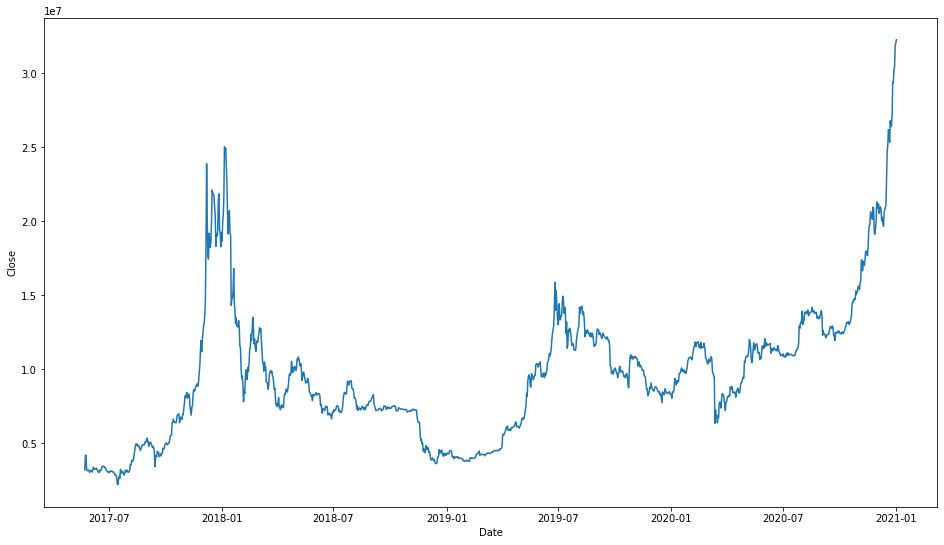

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=btc.index, y='Close', data=btc)
plt.show()

**시작**과 **끝** 날짜를 지정하여 범위 데이터를 가져올 수 있습니다.

In [ ]:
# 비트코인 시세
btc = fdr.DataReader('BTC/KRW', '2019-01-01', '2020-12-01')
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-01,4289000,4199000,4300000,4137000,3230.0,0.0214
2019-01-02,4345000,4294000,4360000,4244000,3860.0,0.0131
2019-01-03,4282000,4352000,4367000,4259000,15370.0,-0.0145
2019-01-04,4309000,4286000,4334000,4243000,19200.0,0.0063
2019-01-05,4297000,4309000,4354000,4278000,24870.0,-0.0028
...,...,...,...,...,...,...
2020-11-27,19119000,19236000,19236000,19119000,1440.0,-0.0067
2020-11-28,19480000,19118000,19480000,19118000,1610.0,0.0189
2020-11-29,20002000,19480000,20002000,19281000,830.0,0.0268


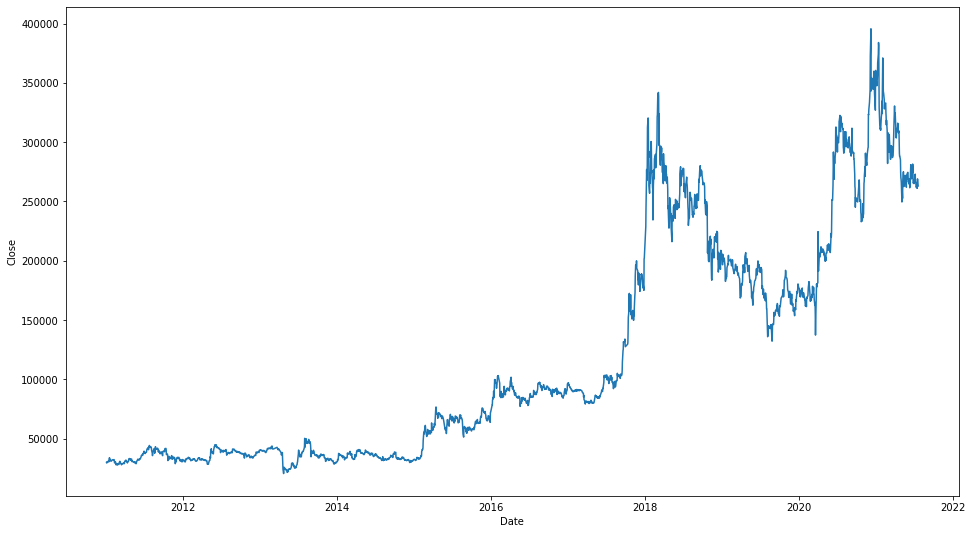

In [7]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=df.index, y='Close', data=df)
plt.show()

그 밖에 **금, 은과 같은 현물**, **달러와 같은 화폐** 데이터도 가져올 수 있습니다.

더욱 자세한 내용은 [GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader)를 참고해 보시기 바랍니다.

In [ ]:
## 주가데이터 가져오기

In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-01-23,786,798,770,776,74200,NaN
1997-01-24,745,793,745,783,98260,0.009021
1997-01-25,787,812,787,795,47620,0.015326
1997-01-27,793,793,764,765,41010,-0.037736
1997-01-28,764,825,757,809,181900,0.057516


In [ ]:
stock.index

DatetimeIndex(['1997-01-23', '1997-01-24', '1997-01-25', '1997-01-27',
               '1997-01-28', '1997-01-29', '1997-01-30', '1997-01-31',
               '1997-02-01', '1997-02-03',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-01-23,786,798,770,776,74200,NaN
1997-01-24,745,793,745,783,98260,0.009021
1997-01-25,787,812,787,795,47620,0.015326
1997-01-27,793,793,764,765,41010,-0.037736
1997-01-28,764,825,757,809,181900,0.057516


## 시각화

Text(0, 0.5, 'price')

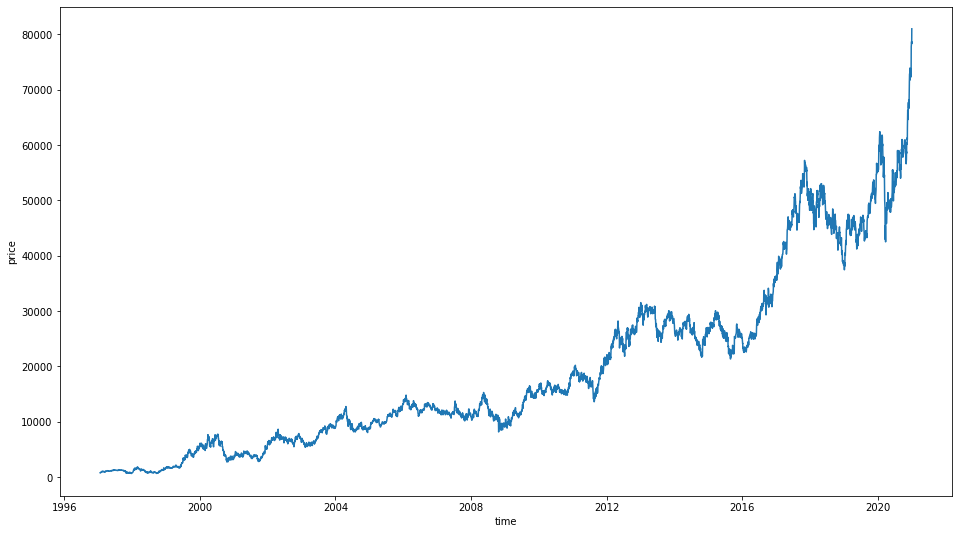

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

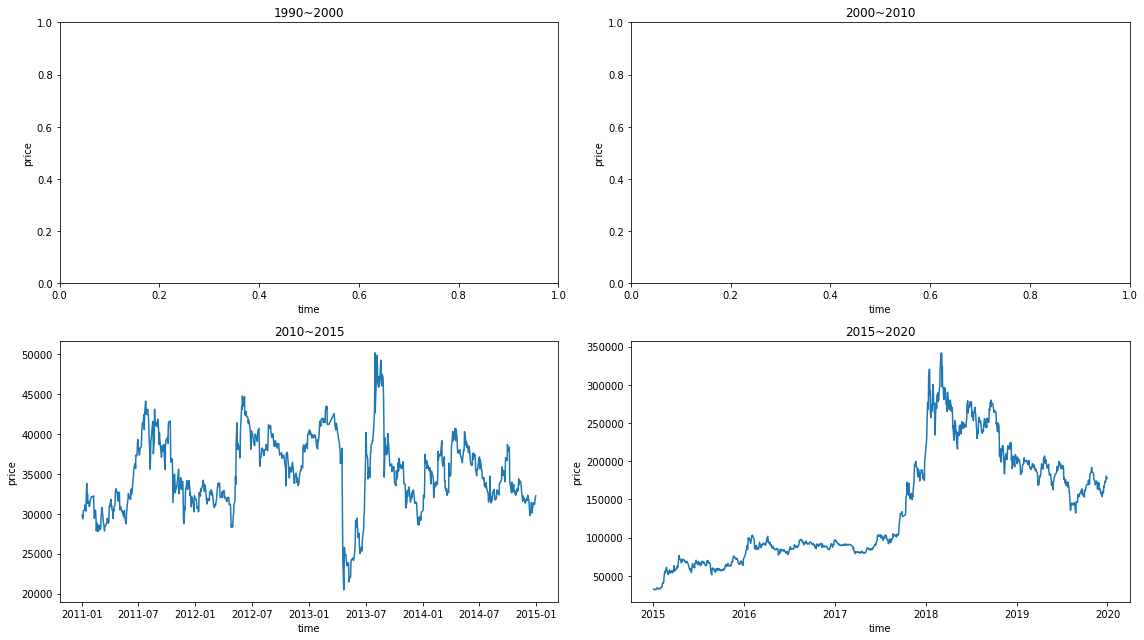

In [9]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## Prophet

### 모듈 import

In [11]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

### 컬럼

- 반드시 **y** 컬럼과 **ds** 컬럼이 존재해야합니다.
- 예측 값은 **y**, 시계열 데이터는 **ds**에 지정합니다.

In [12]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [13]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,y,ds
Date,,,,,,,,
2011-01-03,30246.626953,30646.949219,29179.099609,29846.304688,29743.085938,1317699,29846.304688,2011-01-03
2011-01-04,29579.421875,29801.824219,29179.099609,29357.019531,29255.492188,844905,29357.019531,2011-01-04
2011-01-05,29134.619141,30068.705078,28467.414062,29623.902344,29521.453125,1542996,29623.902344,2011-01-05
2011-01-06,29979.744141,30958.312500,29890.785156,30335.587891,30230.677734,1528002,30335.587891,2011-01-06
2011-01-07,30691.429688,30824.871094,29935.265625,30424.548828,30319.330078,965549,30424.548828,2011-01-07


### prophet 객체 선언 및 학습

In [14]:
m = Prophet()
m.fit(stock)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**period**에 예측 하고 싶은 기간을 입력 합니다.

예측할 시계열 row가 추가 됩니다.

In [15]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
2606,2021-08-14
2607,2021-08-15
2608,2021-08-16
2609,2021-08-17
2610,2021-08-18


- `predict`로 예측을 진행합니다.
- `predict` 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.


In [16]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2606,2021-08-14,331139.791482,303429.916989,358259.769584,331139.791482,331139.791482,-955.372906,-955.372906,-955.372906,-1520.543877,-1520.543877,-1520.543877,565.170972,565.170972,565.170972,0.0,0.0,0.0,330184.418576
2607,2021-08-15,331358.584078,303752.941614,356937.367909,331358.584078,331358.584078,-1258.653257,-1258.653257,-1258.653257,-1520.543710,-1520.543710,-1520.543710,261.890454,261.890454,261.890454,0.0,0.0,0.0,330099.930821
2608,2021-08-16,331577.376674,305654.400780,359928.905108,331577.376674,331577.376674,553.727979,553.727979,553.727979,562.888845,562.888845,562.888845,-9.160865,-9.160865,-9.160865,0.0,0.0,0.0,332131.104653
2609,2021-08-17,331796.169270,303620.642413,357719.729922,331796.169270,331796.169270,635.532152,635.532152,635.532152,878.946865,878.946865,878.946865,-243.414713,-243.414713,-243.414713,0.0,0.0,0.0,332431.701422
2610,2021-08-18,332014.961867,306821.068480,358600.502356,332014.961867,332014.961867,340.135294,340.135294,340.135294,777.394823,777.394823,777.394823,-437.259529,-437.259529,-437.259529,0.0,0.0,0.0,332355.097160


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
2571,2021-07-06,327663.429061,300975.132539,356454.729979
2572,2021-07-07,327531.092190,301148.337823,354525.940878
2573,2021-07-08,326974.977694,298569.759077,353663.975681
2574,2021-07-09,327337.828451,301018.289272,352247.417176
2575,2021-07-12,327539.144939,302516.626414,352751.158735
2576,2021-07-13,328006.047929,303664.106030,353885.981129
2577,2021-07-14,328095.452237,300594.456846,355160.268636
2578,2021-07-15,327783.269344,299977.784305,354932.978965
2579,2021-07-16,328403.779589,301846.462778,354930.432382
2580,2021-07-19,329373.876482,303036.762355,356251.908986


### 시각화

`plot`은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.

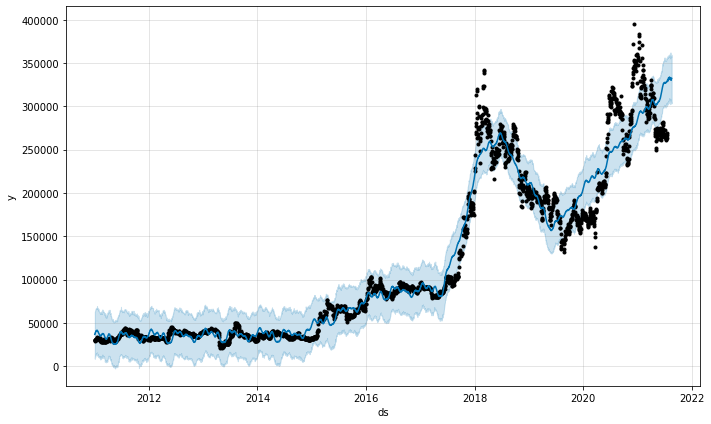

In [18]:
fig = m.plot(forecast)

### plotly 활용

In [19]:
fig = plot_plotly(m, forecast)
fig

### 컴포넌트 별 시각화

컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.

**trend, yearly, weekly 데이터를 시각화**하여 보여 줍니다.

In [20]:
plot_components_plotly(m, forecast)

### change points

By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

처음 80%의 시계열 데이터에 대하여 잠재적인 25개의 changepoints를 만들고, 그 중 선별하여 최종 changepoints를 그래프에서 vertical line으로 그려주게 됩니다.

In [22]:
from fbprophet.plot import add_changepoints_to_plot

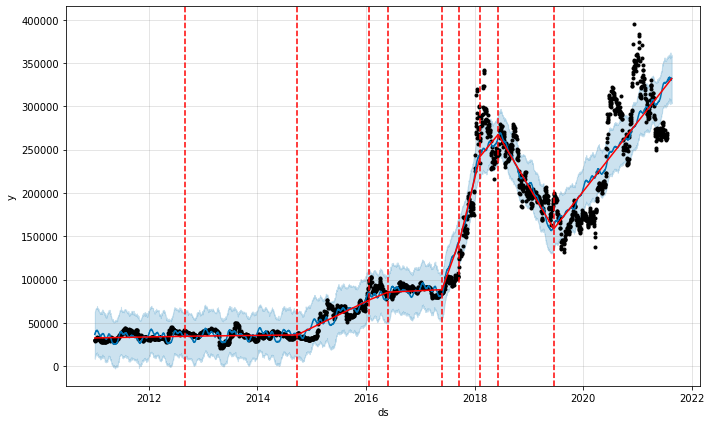

In [23]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### flexibility 조절

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

flexibility **계수가 낮으면 과소적합, 높으면 과대적합**하여 예측하게 됩니다.

중요한 hyperparameter 입니다.

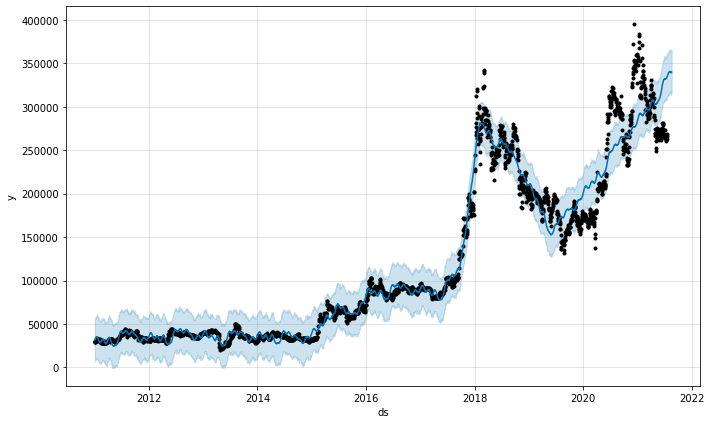

In [26]:
m = Prophet(changepoint_prior_scale=0.8, daily_seasonality=True)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

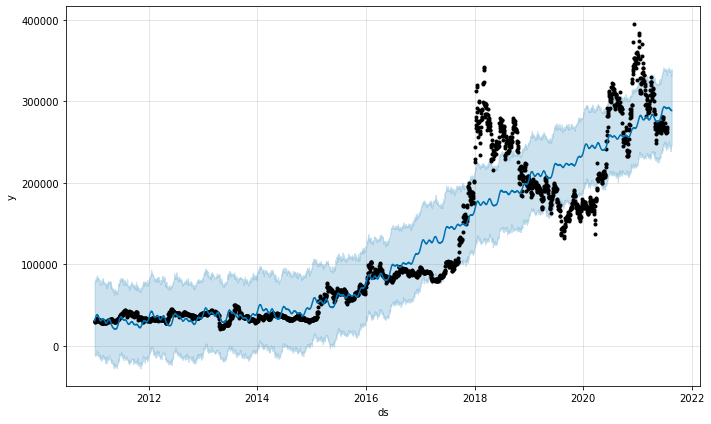

In [27]:
m = Prophet(changepoint_prior_scale=0.01, daily_seasonality=True)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)